## Exploratory Data Analysis

Before we dive into training models we need to take a look at the data and see what kind of data we have to work with. This will allow us to make good decisions when it comes to model training, and use data augmentations that are most likely to benefit the model. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [2]:
data_path = "./data/Training Data"

coast_path = "./data/Training Data/Coast"
desert_path = "./data/Training Data/Desert"
forest_path = "./data/Training Data/Forest"
glacier_path = "./data/Training Data/Glacier"
mountain_path = "./data/Training Data/Mountain"

First I'm just taking a quick count to see how many images in each category I have to work with. 

In [3]:
counts = []

labels = os.listdir(data_path)
for label in labels: 
    counts.append(len([name for name in os.listdir(data_path + f"/{label}") if os.path.isfile(os.path.join(data_path + f"/{label}", name))]))
    

data_counts = pd.DataFrame(counts, index=labels, columns=["Count"])

In [4]:
data_counts

,Count
Coast,2000
Desert,2000
Forest,2000
Glacier,2000
Mountain,2000


Loading up a quick look at eight images from each category. 

In [5]:
coast_names = [name for name in os.listdir(data_path + "/Coast") if os.path.isfile(os.path.join(data_path + "/Coast", name))]
desert_names = [name for name in os.listdir(data_path + "/Desert") if os.path.isfile(os.path.join(data_path + "/Desert", name))]
forest_names = [name for name in os.listdir(data_path + "/Forest") if os.path.isfile(os.path.join(data_path + "/Forest", name))]
glacier_names = [name for name in os.listdir(data_path + "/Glacier") if os.path.isfile(os.path.join(data_path + "/Glacier", name))]
mountain_names = [name for name in os.listdir(data_path + "/Mountain") if os.path.isfile(os.path.join(data_path + "/Mountain", name))]



In [6]:
all_names = [coast_names + desert_names + forest_names + glacier_names + mountain_names]

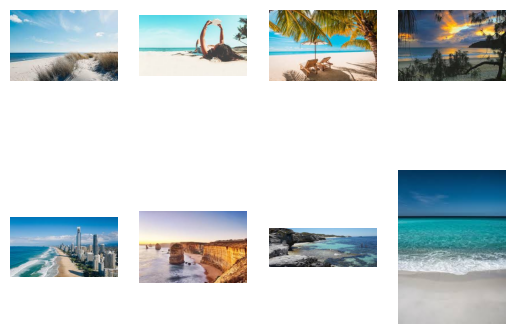

In [7]:
for i in range(8):
    img = cv2.imread('./data/Training Data/Coast/' + coast_names[i])
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(RGB_img)

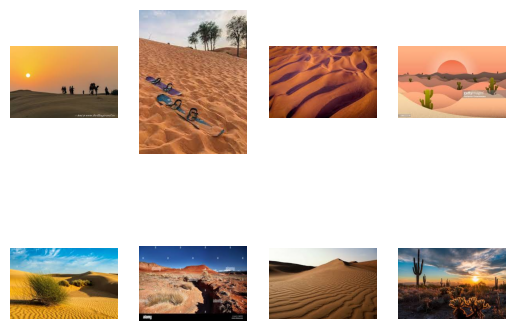

In [8]:
for i in range(8):
    img = cv2.imread('./data/Training Data/Desert/' + desert_names[i])
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(RGB_img)

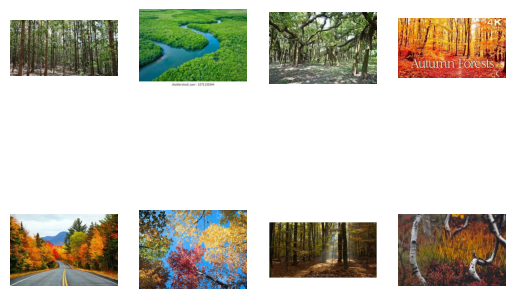

In [9]:
for i in range(8):
    img = cv2.imread('./data/Training Data/Forest/' + forest_names[i])
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(RGB_img)

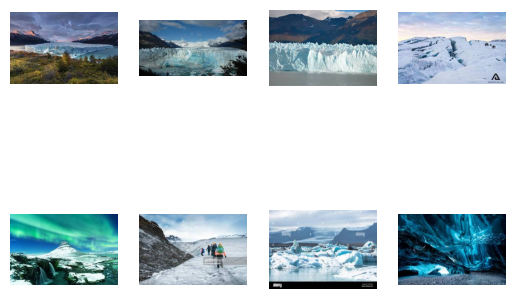

In [10]:
for i in range(8):
    img = cv2.imread('./data/Training Data/Glacier/' + glacier_names[i])
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(RGB_img)

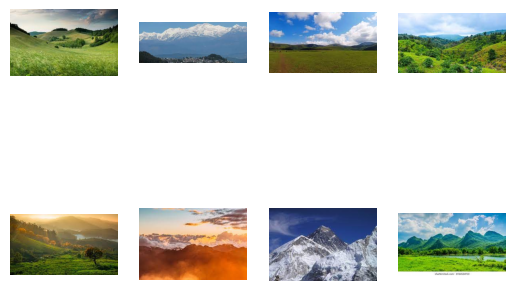

In [11]:
for i in range(8):
    img = cv2.imread('./data/Training Data/Mountain/' + mountain_names[i])
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 4, i+1)
    plt.axis('off')
    plt.imshow(RGB_img)

Even this quick look shows some images with portions of them obscured by overlaid elements. This makes me think implementing an augmentation that masks parts of the photos would be a good idea, to make sure the model can handle these obstructions. 

Aside from that we see a good variety with colours, angles, and such. General data augmentation should hopefully benefit the model.

Now I take a quick look at some of the more common dimensions. All of the images will be resized to square for the model to train on, but pictures with more extreme dimensions will get skewed more by the resizing. 

In [12]:
def dimension_finder(file):
    img = cv2.imread(file)
    h, w = img.shape[:2]
    return h, w


# I am aware this is very inelegant. There has to be a better way to do this, but am harried for time now. 
# Will return later to optimise if possible. 

dims = []


for name in coast_names:
    h,w = dimension_finder(coast_path+ f"/{name}")
    dims.append([h, w])

for name in desert_names:
    h,w = dimension_finder(desert_path+ f"/{name}")
    dims.append([h, w])

for name in forest_names:
    h,w = dimension_finder(forest_path+ f"/{name}")
    dims.append([h, w])

for name in glacier_names:
    h,w = dimension_finder(glacier_path+ f"/{name}")
    dims.append([h, w])

for name in mountain_names:
    h,w = dimension_finder(mountain_path+ f"/{name}")
    dims.append([h, w])
    

In [24]:
dims_df = pd.DataFrame(dims, columns=["Height", "Width"]).reset_index(drop=True)
dims_df.head()

,Height,Width
0,183,275
1,168,300
2,183,275
3,183,275
4,168,300


C:\Users\aaish\AppData\Local\Temp\ipykernel_68516\3033391351.py:3: UserWarning: 
The palette list has fewer values (6) than needed (61) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<AxesSubplot: xlabel='Height', ylabel='Width'>

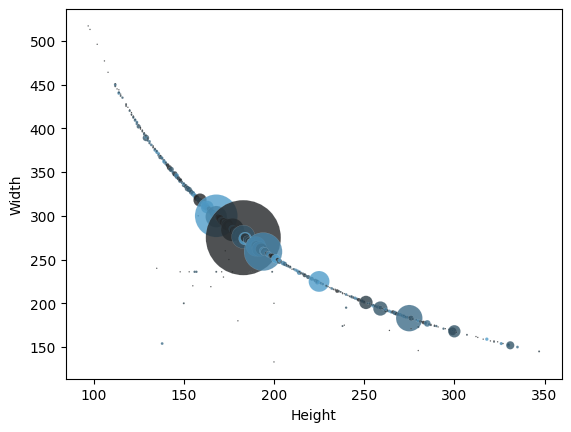

In [21]:
dims_grouped = dims_df.groupby(['Height', 'Width']).size().reset_index().rename(columns={0: "Count"})
colours = np.random.rand(len(dims_grouped))
sns.scatterplot(
    x=dims_grouped["Height"],
    y=dims_grouped["Width"],
    s=dims_grouped["Count"],
    alpha=0.8,
    linewidths=100,
    hue=dims_grouped["Count"],
    palette=(sns.dark_palette("#509DCA")),
    legend=None
)


The vast majority of images are around the 200x300 dimension zone - either slightly smaller or larger. This 2:3 aspect ratio is likely to cause compression along the horizontal scale when the images are resized for training, but there should not be a major loss.